Please upload your 'movie_watch.csv' file...


Saving movie_watch.csv to movie_watch (2).csv

Preview of the dataset:
   watch_time_hour genre_preference  avg_rating_given
0               13           action          2.037554
1                4           comedy          1.350365
2               15         thriller          1.359665
3               14         thriller          1.772998
4               14           comedy          1.202237


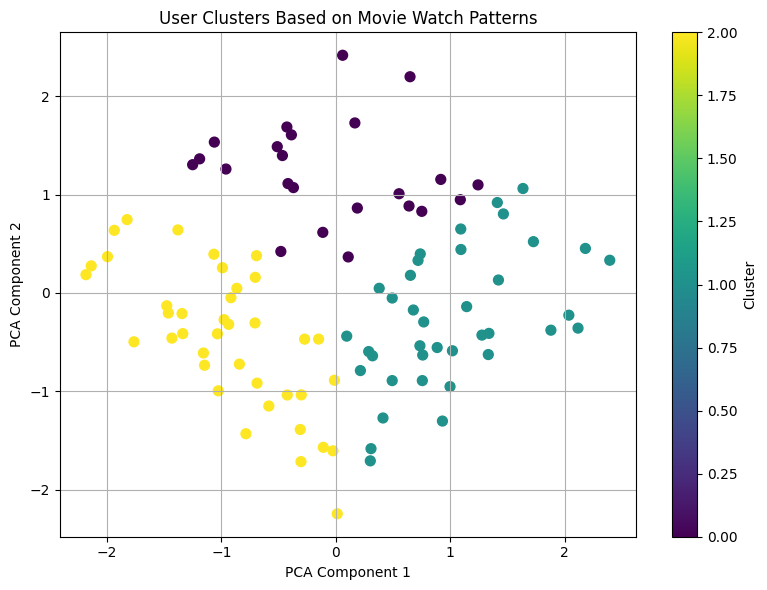

✅ Clustered data saved as 'clustered_movie_watch.csv'


In [4]:
# Import all necessary libraries
import pandas as pd
from google.colab import files
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Step 1: Upload the CSV file
print("Please upload your 'movie_watch.csv' file...")
uploaded = files.upload()

# Step 2: Load the uploaded file
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("\nPreview of the dataset:")
print(df.head())

# Step 3: Define feature types
numeric_features = ['watch_time_hour', 'avg_rating_given']
categorical_features = ['genre_preference']

# Step 4: Preprocessing setup
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 5: KMeans clustering pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Step 6: Fit the pipeline
pipeline.fit(df)

# Step 7: Add cluster labels
df['cluster'] = pipeline.named_steps['kmeans'].labels_

# Step 8: Dimensionality reduction for visualization
X_processed = preprocessor.fit_transform(df.drop('cluster', axis=1))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Step 9: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', s=50)
plt.title("User Clusters Based on Movie Watch Patterns")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 10: Save clustered data to CSV
df.to_csv("clustered_movie_watch.csv", index=False)
print("✅ Clustered data saved as 'clustered_movie_watch.csv'")
